# **BAB 1**
# **PENDAHULUAN**
---
##### Masalah yang akan dibahas pada projek final pada kali ini adalah mengenai Analisis pada opini pengguna Twitter mengenai campaign Lawan Hepatitis
*   Jumlah pengukuran variabel awal sebanyak  88 Data
*   Tipe data yang dipakai pada proyek kali ini diantaranya :
1.  created_at = datetime [ns, UTC]
2.  id = int
3.  id_str = int
4.  full_text = object
5.  truncated = bool
6.  display_text_range = object
7.  entities = object
8.  metadata = object
9.  source = object
10.  in_reply_to_status_id = float
11.  in_reply_to_status_id_str = float
12.  in_reply_to_user_id = float
13.  in_reply_to_user_id_str = float
14.  in_reply_to_screen_name = float
15.  user = object
16.  geo = float
17.  coordinates = float
18.  place = object
19.  contributors = float
20.  is_quote_status = bool
21.  retweet_count = int
22.  favorite_count = int
23.  favorited = bool
24.  retweeted = bool
25.  lang   = object
26.  extended_entities = object
27.  possibly_sensitive = float
28.  retweeted_status = object

* Penjelasan dari pengukuran-pengukuran tersebut :

1. 	created_at  = Menunjukkan waktu tweet dibuat, sesuai UTC negara masing-masing.
2. 	id = nomer identitas pengguna.
3. 	id_str = nomer identitas pengguna.
4. 	full_text = Berisi teks dari tulisan pengguna twitter.
5. 	truncated = Berisi nilai False atau True untuk kondisi teks jika berkelanjutan. Biasanya terjadi True jika cuitan berupa Thread.
6. 	display_text_range = Panjang teks yang di tulis.
7. 	Entities = Kata-kata atau objek unik, seperti hastagh dan lainnya.
8. 	Metadata = berisikan Kode unik Bahasa yang digunakan.
9. 	Source = Link cuitan twitter.
10.  in_reply_to_status_id = nomer identitas reply yang me-reply cuitan.
11.  in_reply_to_status_id_str = nomer identitas reply yang me-reply cuitan.
12.  in_reply_to_user_id = nomer identitas pengguna yang me-reply cuitan.
13.  in_reply_to_user_id_str = nomer identitas pengguna yang me-reply cuitan.
14.  in_reply_to_screen_name = Nama pengguna yang di tampilkan (bukan username).
15.  user = nama pengguna.
16.  geo = letak geografi pengguna.
17.  coordinates = Berisi nilai Latitude dan Longtitud saat menulis cuitan.
18.  place = Lokasi saat menulis cuitan.
19.  contributors = Jumlah pengguna lain yang melakukan interaksi terhadap cuitan.
20.  is_quote_status = Isi retweet pengguna lain.
21.  retweet_count = Jumlah pengguna lain yang melakukan retweet ke cuitan.
22.  favorite_count = Jumlah pengguna lain yang melakukan like ke cuitan.
23.  favorited   = Pengguna lain yang melakukan like.
24.  retweeted = Pengguna lain yang melakukan retweet.
25.  lang   = jenis Bahasa yang dibunakan.
26.  extended_entities = Media-media yang ada di dalam cuitan, seperti foto, music/suara, video, Gif dan lainnya.
27.  possibly_sensitive = Keterangan untuk jenis media yang adakah, apakah perlu ada Flag pada media tersebut.
28.  retweeted_status = Keterangan apakah cuitan itu Retweet atau bukan.









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **BAB 2**
# **PREPROCESSING**
---

# ***Import Module dan Library yang akan digunakan***
---

##### Pada tahap pertama, melakukan import library dan module untuk mengerjakannya. Mengambil data realtime yang berasal dari media sosial Twitter.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-09 12:55:19--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py.1’

taudataDDGsna.py.1  100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-09 12:55:19 (70.5 MB/s) - ‘taudataDDGsna.py.1’ saved [8030/8030]

--2022-06-09 12:55:19--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 883

In [ ]:
import taudataDDGsna as tau
import taudataEDA02CTA as tau2
import tweepy, json, urllib.request, requests, csv
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

# ***Mengambil Data Realtime dari Media Sosial Twitter***
---

In [ ]:
Ck = '0HDw0xjWsn6ZbuzDsJyuwTsIG' # consumer_key
Cs = 'zzpCg6wTguJ0r0RriTUaz4sclBSAfPhfrjR7KySojsEvqAZOQg' # consumer_secret
At = '1523668596345700352-Y1WgCrmhlVp1T9fsso91yDkbq68J6u' # access_token
As = 'r0tX187mb9YkFAzqqIp12e90lyQuXJdLvDvleEHgUmrAW' # access_secret

'Done'

'Done'

In [ ]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Sanchia Natisha Kenzie" you are now connected to twitter server


Berdasarkan frekuensi yang terlihat terhitung tanggal 7 Juni 2022 bahwa, topik seputar **#LawanHepatitis** merupakan salah satu topik yang paling sering dibahas akhir-akhir ini. Oleh karena itu, topik ini akan dianalisa lebih dalam.
Disini, akan dimasukkan kata kunci berupa 'Lawan Hepatitis' dan mengambil sebanyak 10000 tweet.

In [ ]:
qry = 'Lawan Hepatitis'
N = 10000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)

"Done"

87it [00:01, 53.44it/s]


'Done'

Berikut merupakan orang yang mengupload tweet yang mengandung kata kunci 'Lawan Hepatitis'.

In [ ]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 07 02:28:40 +0000 2022',
 'display_text_range': [0, 213],
 'entities': {'hashtags': [{'indices': [128, 143], 'text': 'LawanHepatitis'},
   {'indices': [191, 213], 'text': 'TetapSehatPakaiMasker'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Kita harus selalu waspada dari segala macam penyakit terutama penyakit hepatitis akut ini yuk kita sama-sama lawan penyakit ini #LawanHepatitis dengan cara selalu mematuhi protokol kesehatan #TetapSehatPakaiMasker',
 'geo': None,
 'id': 1533999351915089920,
 'id_str': '1533999351915089920',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': Fa

In [ ]:
# T bukan sekedar list of tweets
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 87 tweets


In [ ]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 07 02:28:40 +0000 2022',
 'display_text_range': [0, 213],
 'entities': {'hashtags': [{'indices': [128, 143], 'text': 'LawanHepatitis'},
   {'indices': [191, 213], 'text': 'TetapSehatPakaiMasker'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Kita harus selalu waspada dari segala macam penyakit terutama penyakit hepatitis akut ini yuk kita sama-sama lawan penyakit ini #LawanHepatitis dengan cara selalu mematuhi protokol kesehatan #TetapSehatPakaiMasker',
 'geo': None,
 'id': 1533999351915089920,
 'id_str': '1533999351915089920',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': Fa

Berikut merupakan kata-kata yang ditweet oleh pengguna pertama yang mengandung kata kunci #LawanHepatitis

In [ ]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Tue Jun 07 02:28:40 +0000 2022',
 'Kita harus selalu waspada dari segala macam penyakit terutama penyakit hepatitis akut ini yuk kita sama-sama lawan penyakit ini #LawanHepatitis dengan cara selalu mematuhi protokol kesehatan #TetapSehatPakaiMasker')

In [ ]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "IstinanR" : "Kita harus selalu waspada dari segala macam penyakit terutama penyakit hepatitis akut ini yuk kita sama-sama lawan penyakit ini #LawanHepatitis dengan cara selalu mematuhi protokol kesehatan #TetapSehatPakaiMasker"


## ***Menyimpan Hasil Crawling***
---

Disini, akan disimpan crawling tersebut dalam bentuk data text sederhana berformat json.

In [ ]:
import json
def saveTweets(tweets, file='Tweets.xlsx'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(xlsx.dumps(t)+'\n')
            except:
                pass

In [ ]:
# Menyimpan hasil crawling twitter
fileName = 'TweetLawan hepatitis 2022.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to TweetLawan hepatitis 2022.json


# ***Preprocessing Data Text***
---

Impor data preprocessing yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

In [ ]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
# Mari kita coba #1
topic = 'Lawan Hepatitis'
T = api.search_tweets(q=topic, lang='id', tweet_mode = 'extended')
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['Kita harus selalu waspada dari segala macam penyakit terutama penyakit hepatitis akut ini yuk kita sama-sama lawan penyakit ini #LawanHepatitis dengan cara selalu mematuhi protokol kesehatan #TetapSehatPakaiMasker',
 'Yuk lebih bijak lagi buang popok sekali pakai ke tempatnya! Kasihan kan orang lain, kita harus tetap waspda Lawan Hepatitis Akut #TetapSehatPakaiMasker  #LawanHepatitis',
 'Ayo jaga diri sendiri dan orang sekitar dengan #TetapSehatPakaiMasker hepatitis akut bahaya banget ayo kita lawan bersama #LawanHepatitis https://t.co/sJYWl5mdo6',
 'Yuk buang popok sekali pakai ke tempatnya! Kasihan kan orang lain, kita harus tetap waspda Lawan Hepatitis Akut #TetapSehatPakaiMasker  #LawanHepatitis https://t.co/dQk6APj78C',
 'Jangan takut ya sama hepatitis akut! Kita juga bisa lawan dengan cara minum air bersih dan matang serta menggunakan masker..  Ayukk budayakan hidup bersih dan sehat #TetapSehatPakaiMasker #LawanHepatitis https://t.co/EkBYaq90V5',
 'Penggunaan masker, menjaga ke

Melakukan proses penanganan stopword dan data slang atau singkatan dalam data text. Berikut merupakan tampilan data hasil cleaning setelah dilakukan proses penganganan stopword, slang data dan proses lemma.

In [ ]:
# Loading Stopwords: Ada beberapa cara
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()

NLTK_StopWords = stopwords.words('indonesian')
Sastrawi_StopWords_id = factory.get_stop_words()

df=open('data/stopwords_id.txt',"r",encoding="utf-8", errors='replace')
id_stop = df.readlines()
df.close()
id_stop = [t.strip().lower() for t in id_stop]

N = 10
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords))

N = 10
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
126 758 758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
126 758 758


In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('iya')

'iya' in stopId

True

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('gaess')

'gaess' in stopId

True

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

cleaned_data = []
for tweet in tqdm(isiTweet):
    cleaned_data.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

cleaned_data[:7]

100%|██████████| 15/15 [00:01<00:00,  8.13it/s]


['waspada sakit sakit hepatitis akut ayo lawan sakit lawan hepatitis patuh protokol sehat sehat pakai masker',
 'ayo bijak buang popok pakai kah tempat kasihan orang waspda lawan hepatitis akut sehat pakai masker lawan hepatitis',
 'ayo jaga orang sehat pakai masker hepatitis akut bahaya banget ayo lawan lawan hepatitis',
 'ayo buang popok pakai kah tempat kasihan orang waspda lawan hepatitis akut sehat pakai masker lawan hepatitis',
 'takut iya hepatitis akut lawan minum air bersih matang masker ayukk budaya hidup bersih sehat sehat pakai masker lawan hepatitis',
 'guna masker jaga bersih cuci tangan cegah lakuin iya lawan hepatitis sehat pakai masker lawan hepatitis',
 'waspada sakit sakit hepatitis akut ayo lawan sakit lawan hepatitis patuh protokol sehat sehat pakai masker']

### ***Menyimpan Hasil Preprocessing untuk Divisualisasikan***
---

In [ ]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools

filename = tweet.replace(".json", ".txt")
tau2.saveTweets(cleaned_data, file=filename, type_="plain")

"Tweets Saved: ".format(filename) # Silahkan cek di folder "Data", pindahkan ke Desktop untukk memudahkan tahap selanjutnya

'Tweets Saved: '

File hasil preprocessing dapat diakses di link berikut: https://drive.google.com/drive/folders/1BBGWgs-xyhy5WIfn37S6QTmaqWvAd38i?usp=sharing

# **BAB 3**
# **ANALISIS DASAR STATISTIKA**
---

# ***Visualisasi Data Menggunakan Voyant***
---
Voyant dapat digunakan dalam 2 cara:
* Online: https://voyant-tools.org/
##### Kelebihan: Sederhana & portable, tanpa harus install di komputer kita.
##### Kekurangan: butuh koneksi internet, tidak cocok untuk data teks yang besar, privacy.

* Offline di komputer kita [Java Based]

##### Pada visualisasi  kali ini,  akan digunakan Voyant Online untuk memudahkan proses visualisasi dari data text hasil preprocessing.
##### Berikut merupakan hasil dari visualisasi yang dilakukan menggunakan Voyant Online.

Untuk hasil visualisasi yang lebih lengkap, dapat dilihat di link berikut.

https://bit.ly/VisualisasiVoyantKelompok16

## ***Trends***
---

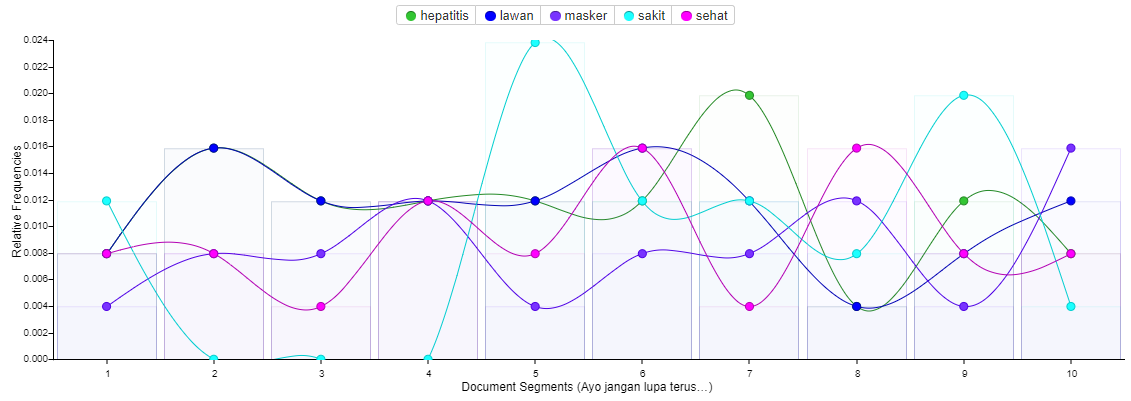

### **Analisis**

Hasil visualisasi dengan trend menunjukkan kestabilan kata yang muncul pada data.

Kata-kata tersebut adalah:
* Hepatitis

  Pada awalnya, kata 'hepatitis' muncul secara stabil, tetapi tiba-tiba terdapat penurunan yang cukup dratis, lalu setelah itu kembali stabil.

* Lawan

  Kata 'lawan' mirip seperti kata hepatisis kestabilannya. Awalnya stabil, lalu terdapat penurunan yang cukup drastis, dan setelah itu kembali stabil.

* Masker

  Kata 'masker' tidak muncul stabil, selalu turun naik tetapi tidak secara drastis.

* Sakit

  Kata 'masker' juga muncul tidak stabil. Kata 'sakit' selalu naik dan turun secara drastis,tetapi terdapat sedikit bagian yang stabil.

* Sehat

  Kata 'sehat' awalnya cukup muncul secara stabil, tetapi dibagian akhir terdapat sedikit penurunan dan kenaikan.











## ***Cirrus***
---

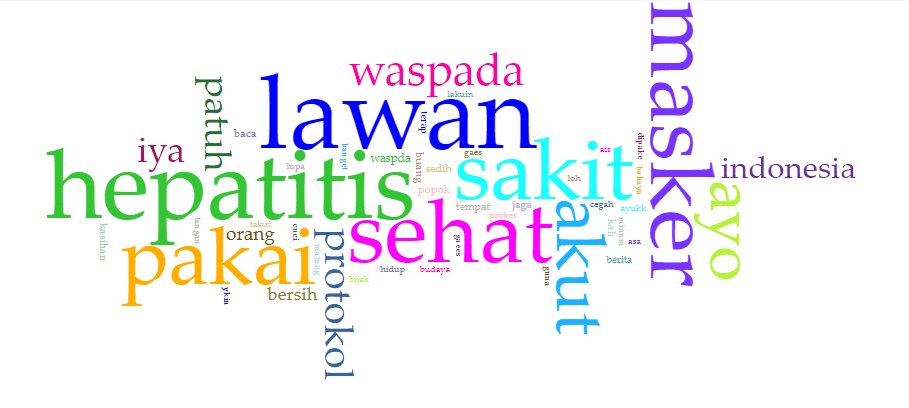

### **Analisis**
Berdasarkan hasil visualisasi Cirrus, kita dapat melihat beberapa kata dari yang paling sering dituliskan hingga yang paling jarang dituliskan. Urutan Kata dari yang paling sering hingga paling jarang adalah
1. hepatitis, masker, dan lawan
2. sehat, sakit, akut, dan pakai
3. protokol, patuh, dan waspada
4. dan seterusnya hingga air, asa, lupa, baca, dll.

## ***Word Clouds***
---
Visualisasi ini dibuat menggunakan *generator online* pada link berikut: https://www.wordclouds.com

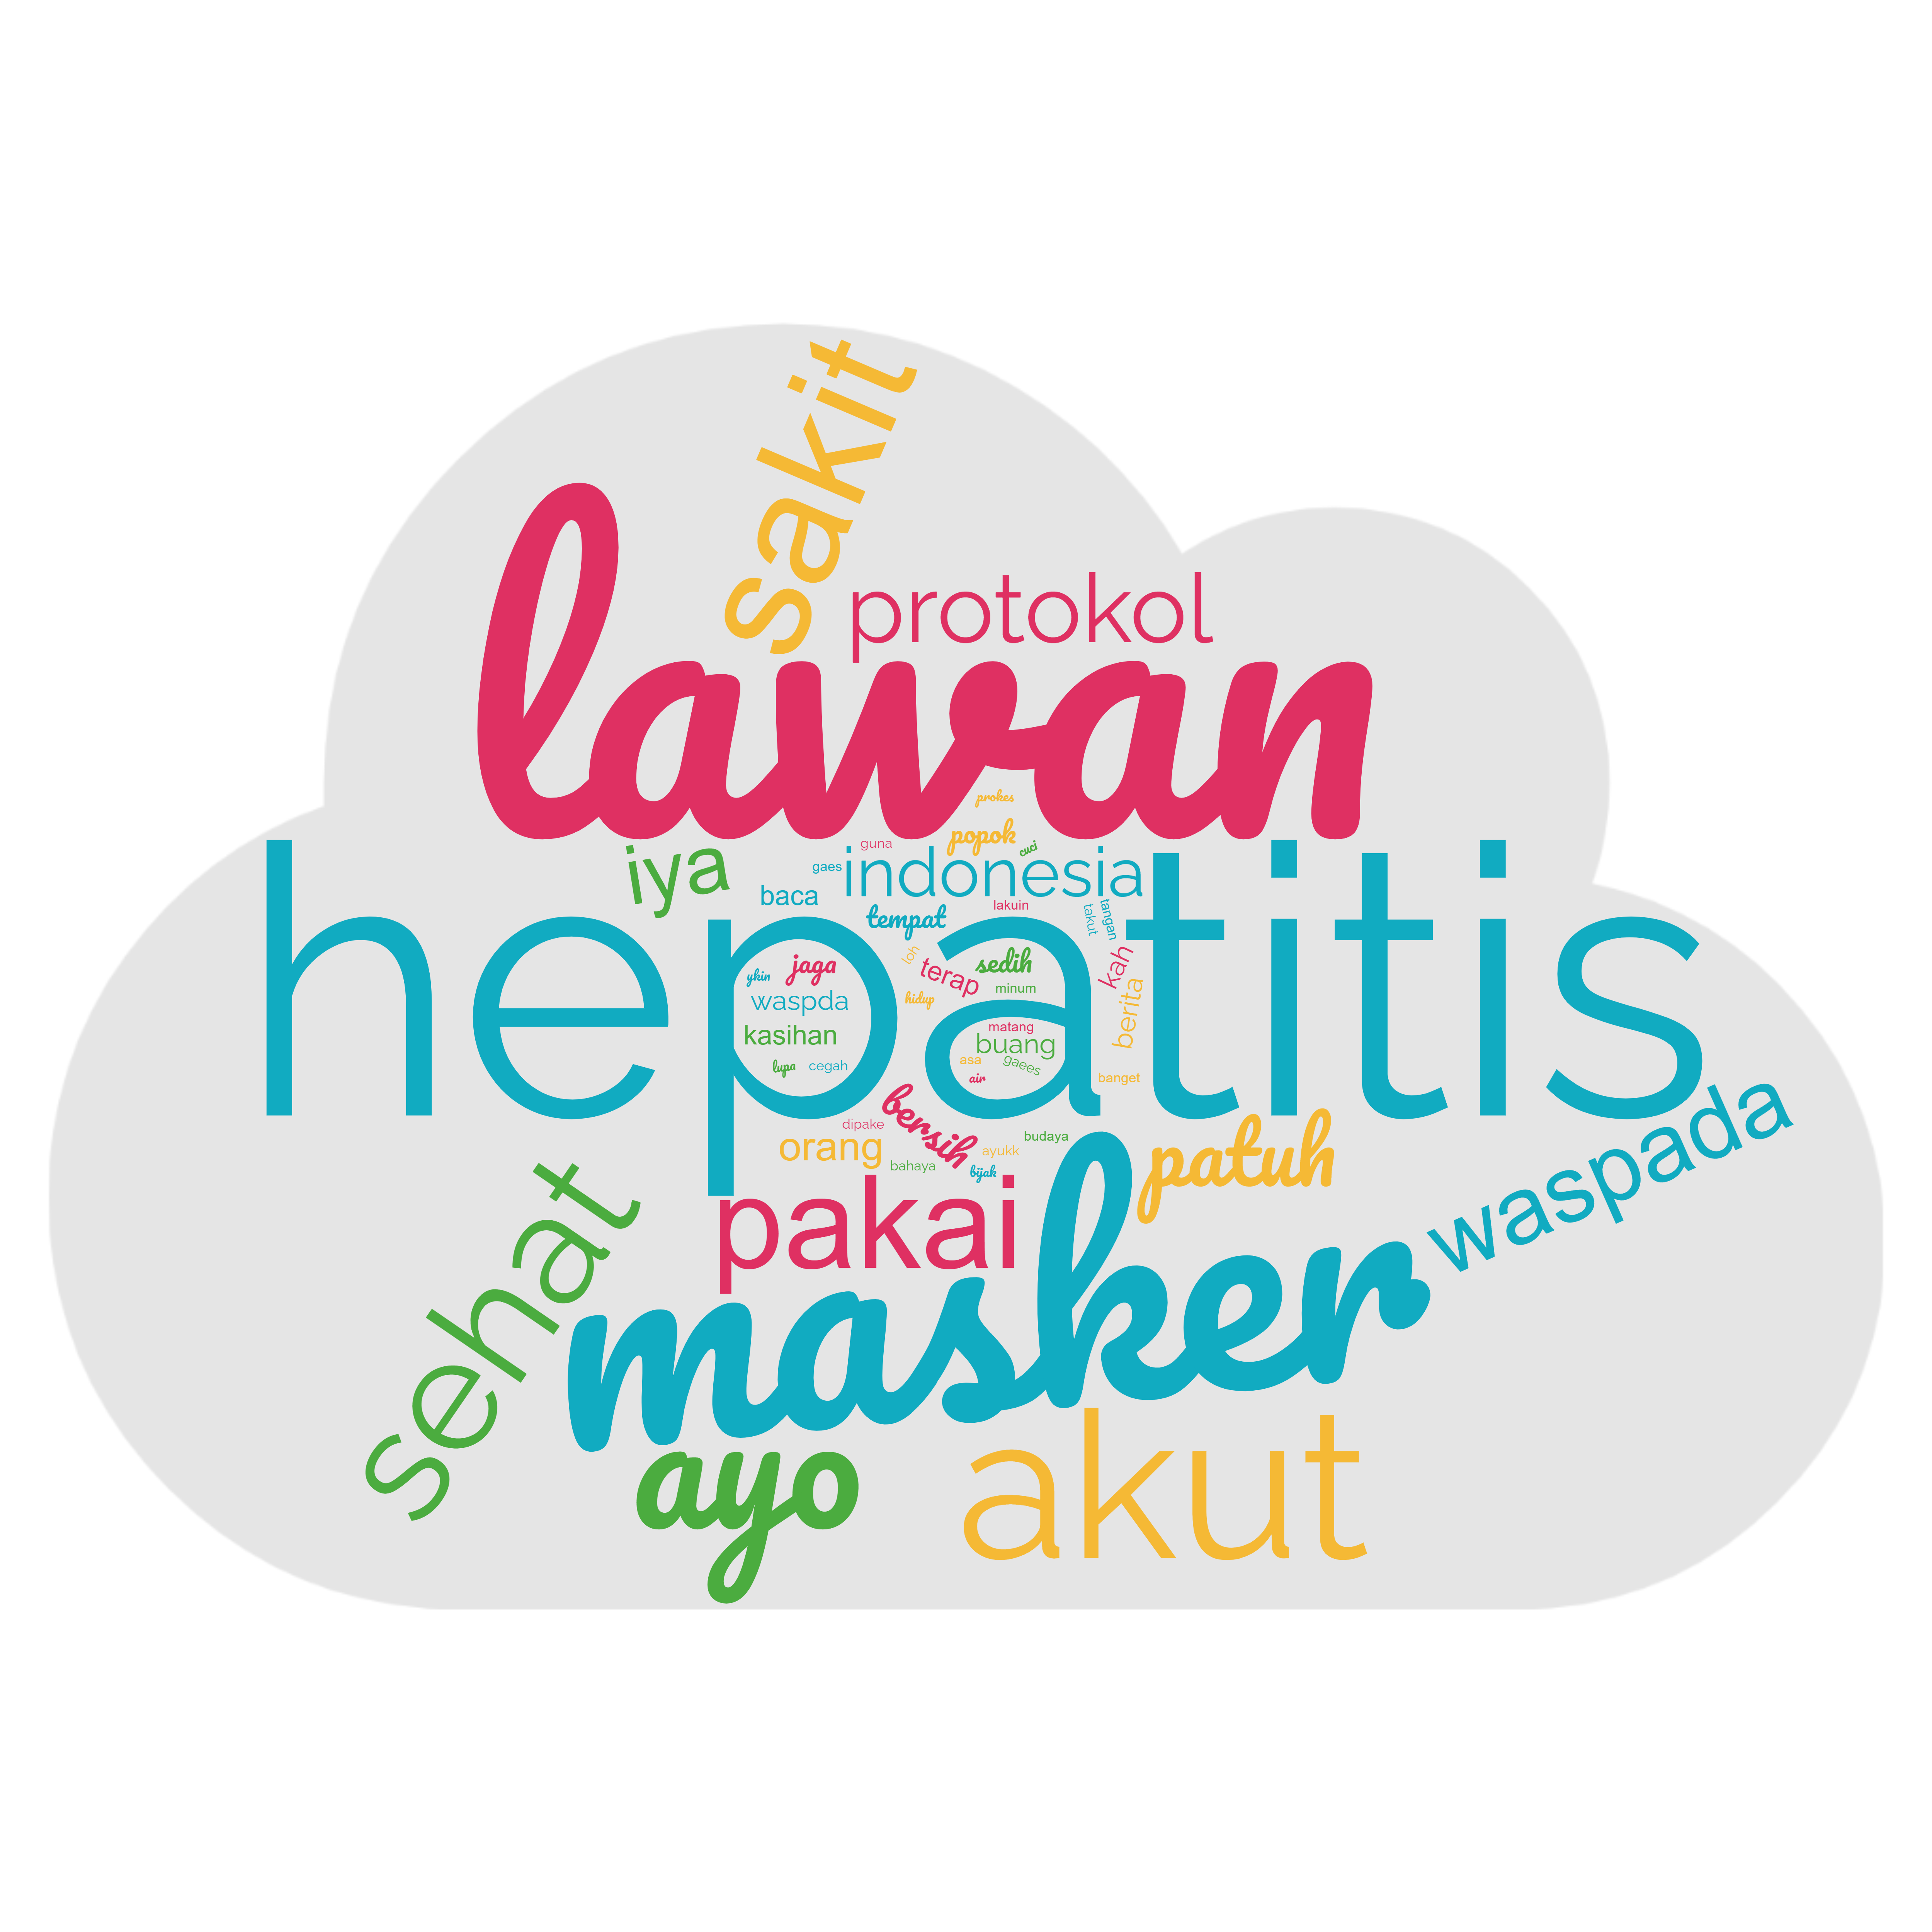

### **Analisis**
Hasil visualisasi menggunakan word cloud hasilnya mirip dengan visualisasi dengan menggunakan cirrus. Ditampilkan beberapa kata kunci seperti hepatitis, lawan, dan masker.

## ***Word Links***
---

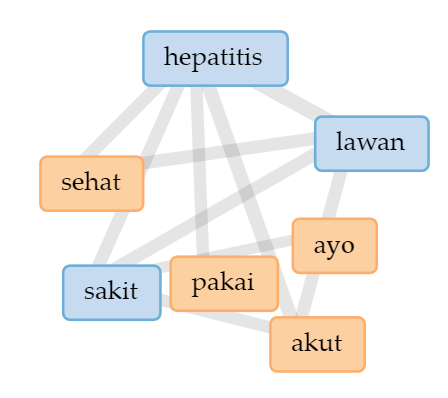

### **Analisis**

Hasil visualisasi dengan word link menunjukkan kata yang saling berhubungan, yaitu:


* sehat yang berhubungan dengan lawan dan hepatitis.

* sakit yang berhubungan dengan hepatitis, lawan, ayo, dan akut.

* hepatitis yang berhubungan dengan sehat, sakit, pakai, akut, dan lawan.

* pakai yang berhubungan dengan hepatitis.

* ayo yang berhubungan dengan lawan, akut, dan sakit.

* akut yang berhubungan dengan ayo, lawan, sakit, dan hepatitis.










## ***Word Tree***
---
Selengkapnya dapat dilihat di : https://bit.ly/VisualisasiWordTreeKelompok16

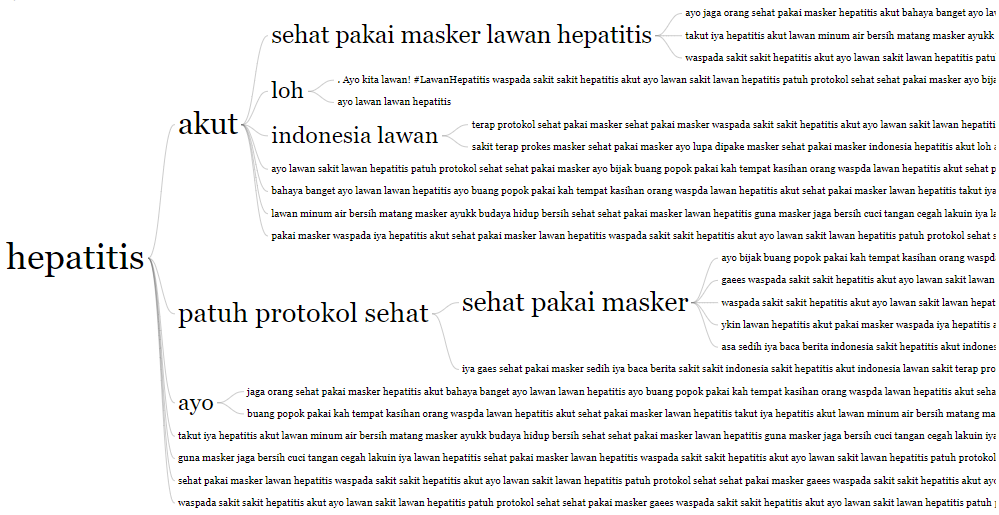

### **Analisis**

Hasil visualisasi dengan word tree menunjukkan rangkuman kesinambungan antar kata dari data yang di pilih.


* Hepatitis berkesinambungan dengan akut, patuh protokol sehat, dan ayo.
*  Akut berkesinambungan dengan sehat pakai masker lawan hepatitis, dan indonesia lawan.
*  patuh protokol sehat berkesinambungan dengan sehat pakai masker.
*   dll.





# ***Kesimpulan***

Data yang di pilih adalah data yang berasal dari twitter dengan topik "Lawan Hepatitis" karena penyakit Hepatitis sedang sering dibicarakan di Indonesia akhir-akhir ini.

Berdasarkan visualisasi, dapat disimpulkan bahwa terdapat beberapa kata kunci, yaitu Hepatitis, lawan, masker, sehat, dan sakit. Dan dari hasil tersebut, kita dapat mengetahui bahwa masyarakat mengajak kita untuk lawan hepatitis karena hepatitis merupakan penyakit akut yang sangat berbahaya bagi tubuh kita. Beberapa cara yang dapat kita lakukan adalah mematuhi protokal kesehatan, tetap memakai masker saat berada di ruangan yang tertutup, dan rajin mencuci tangan.  